**Problem Statement:**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and how well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.
---

In [1]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
warnings.filterwarnings('ignore')

# Reading and Understanding the Data¶
---

In [3]:
# Reading data from csv
housing_df= pd.read_csv('train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Checking shape
housing_df.shape

(1460, 81)

In [5]:
# Checking dataframe info
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking descriptive statistics
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Basic Data Cleanup
---

### Missing value check and imputation using Business Logic

In [7]:
## Checking percentage of missing values
missing_info= round(housing_df.isna().sum() * 100/housing_df.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64

- Above 19 columns have missing values.
- It can be seen that PoolQC, MiscFeature, Alley, Fence and FireplaceQu have very high percentage of missing value.
- I'll check all the columns to understand if these are actually missing or these have some meaning. Once it's identified, imputation can be performed:
    - **Imputation using Business Knowledge** : If NaN signifies any business logic, then we can impute NaN with that.
    - **Statistical Imputation**: Statistical imputation methods can be used to impute missing values after train-test split.


In [8]:
# Getting column names having missing values
missing_val_cols= missing_info[missing_info > 0].sort_values(ascending= False).index
missing_val_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical'],
      dtype='object')

In [9]:
# Checking unique values in these columns
for col in missing_val_cols:
  print('\nColumn Name:',col)
  print(housing_df[col].value_counts(dropna= False))


Column Name: PoolQC
PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64

Column Name: MiscFeature
MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

Column Name: Alley
Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

Column Name: Fence
Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

Column Name: MasVnrType
MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

Column Name: FireplaceQu
FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

Column Name: LotFrontage
LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: count, Length: 111, dtype: int64

Column Name: GarageType
GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN

- In Data Dictionary it's mentioned that, NA for below features denote that these features are not present for the house:

**'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'**

So here, we will replace NaN values for above attributes withh 'Not Present'.

- For rest of the columns we'll check if they have any relation with other columns and if we can use that relation in observed daat to impute these columns:

**LotFrontage, GarageYrBlt, MasVnrArea, MasVnrType, Electrical**


In [10]:
# Replacing NaN with 'Not Present' for below columns
valid_nan_cols= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
housing_df[valid_nan_cols]= housing_df[valid_nan_cols].fillna('Not Present')

In [11]:
# Checking percentage of missing values again
missing_info= round(housing_df.isna().sum() * 100/housing_df.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

MasVnrType     59.73
LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [12]:
# Checking if there is any relation between GarageYrBlt and GarageType
housing_df[housing_df.GarageYrBlt.isna()]['GarageType'].value_counts(normalize= True)

GarageType
Not Present    1.0
Name: proportion, dtype: float64

Initially GarageYrBlt and GarageType both had 5.55% missing value. After imputing NaN values of GarageType with 'Not Available', we can see that GarageYrBlt value is NaN for only those observations where GarageType is 'Not Available'. 
We can conclude that if garage is not available then there will be no 'GarageYrBlt' value for that. So we can safely **impute GarageYrBlt NaN values with 0**.

In [13]:
# Imputing missing values of GarageYrBlt column
housing_df['GarageYrBlt']= housing_df['GarageYrBlt'].fillna(0)

I'll perform statistical imputation for rest of the columns after train-test split: **LotFrontage, MasVnrArea, MasVnrType, Electrical**

### Changing data types

MSSubClass:  "identifies the type of dwelling involved in the sale", is a categorical variable, but it's appearing as a numeric variable.

In [14]:
# Changing data type of MSSubClass
housing_df['MSSubClass']= housing_df['MSSubClass'].astype('object')

# Exploratory Data Analysis
----

There are 81 attributes in the dataset. So, I am running SweetViz AutoEDA to explore and vizualize the data. The I'll manually explore the attributes that have high correlation coefficient with the target variable.


### Visualizing numeric variables:

<Axes: xlabel='SalePrice', ylabel='Density'>

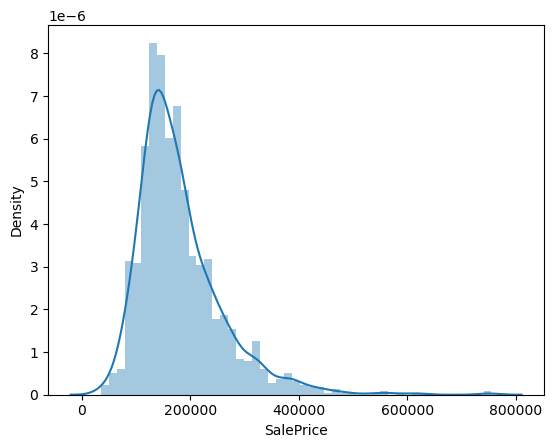

In [15]:
# Checking distribution of SalePrice
sns.distplot(housing_df['SalePrice'])

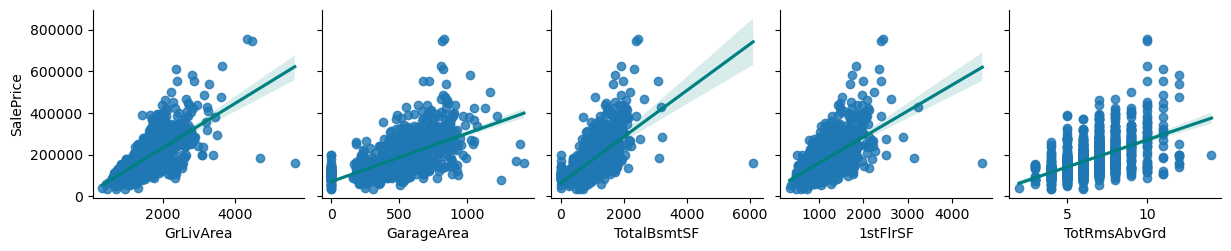

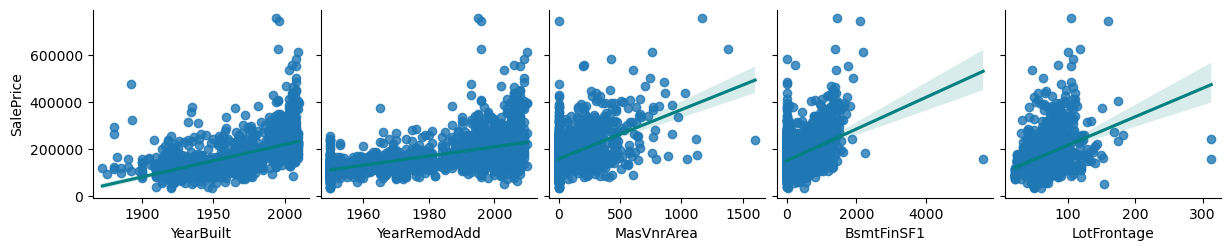

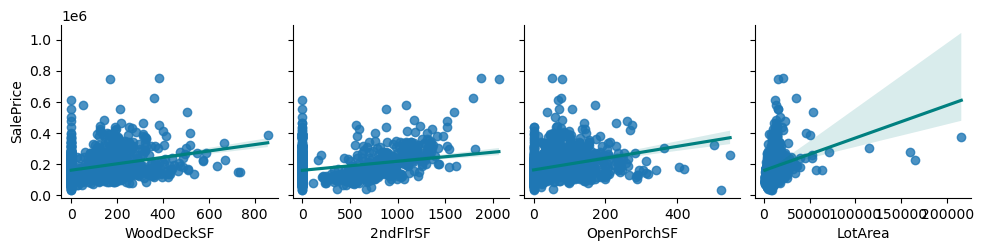

In [16]:
# Plotting numeric variables against SalePrice

numeric_cols= ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']

sns.pairplot(housing_df, x_vars=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing_df, x_vars=['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing_df, x_vars=['WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})

### Visualizing categorical variables:

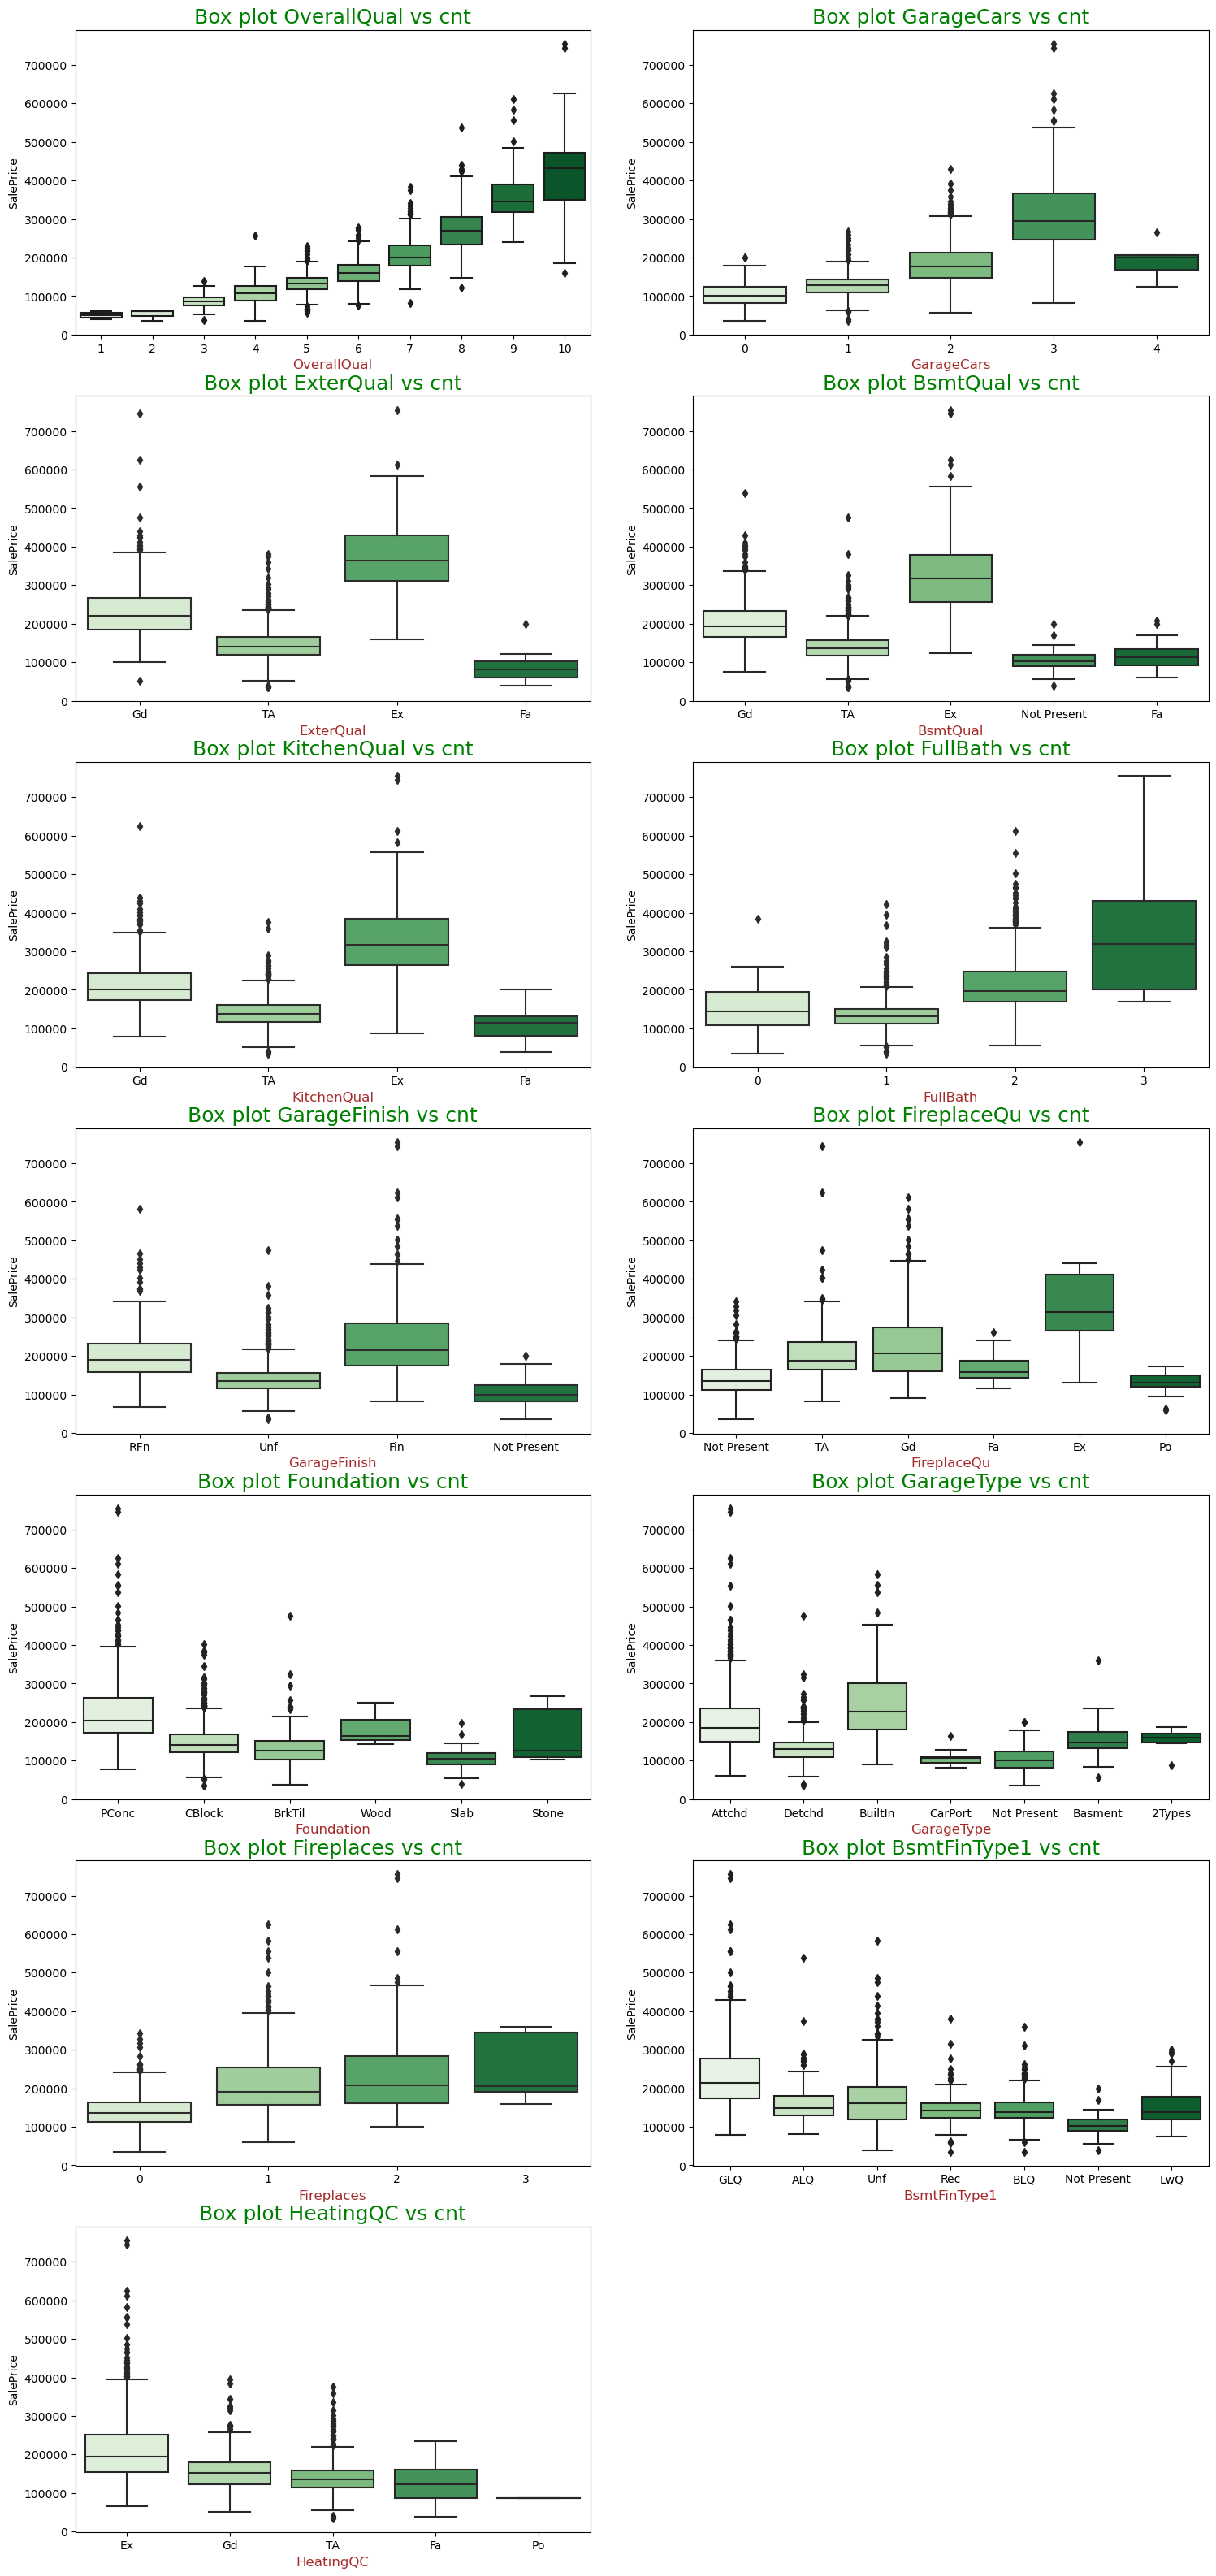

In [17]:
# Box plot of catego

cat_cols= ['OverallQual','GarageCars','ExterQual','BsmtQual','KitchenQual','FullBath','GarageFinish','FireplaceQu','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

plt.figure(figsize=[18, 40])

for i, col in enumerate(cat_cols, 1):
    plt.subplot(7,2,i)
    title_text= f'Box plot {col} vs cnt'
    x_label= f'{col}'
    fig= sns.boxplot(data= housing_df, x= col, y= 'SalePrice', palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})
plt.show()

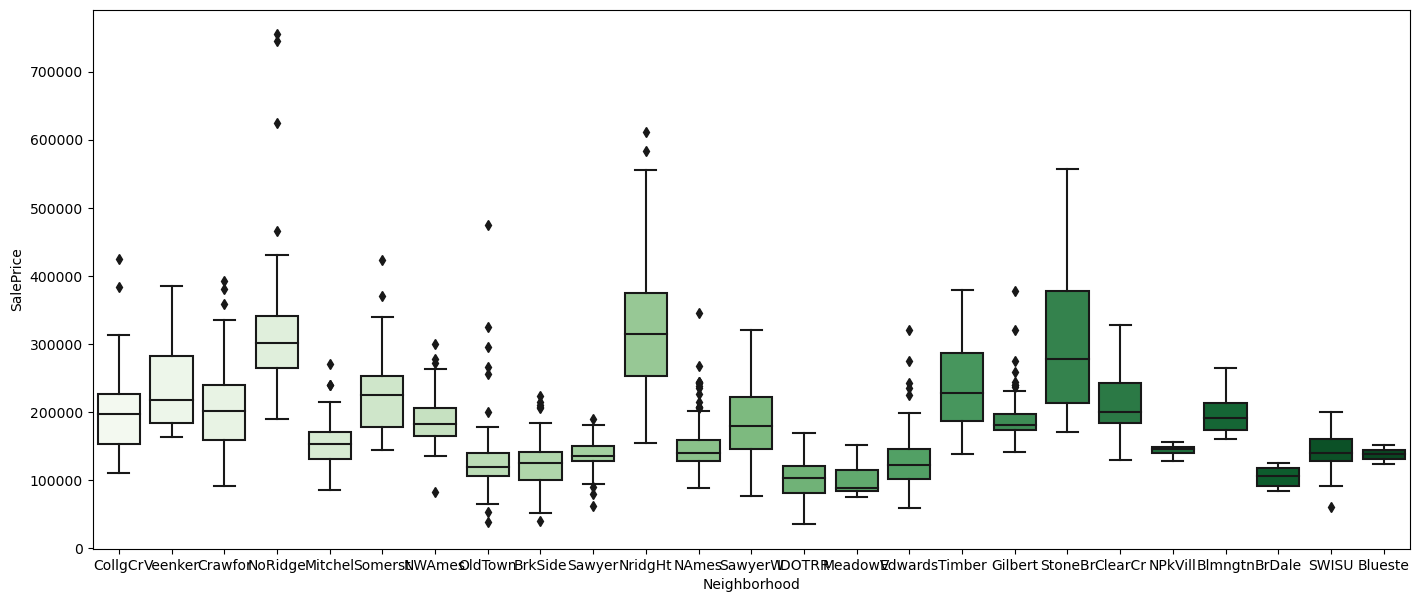

In [18]:
plt.figure(figsize=[17,7])
sns.boxplot(data= housing_df, x= 'Neighborhood', y= 'SalePrice', palette= 'Greens')
plt.show()

### Inferences

- SalePrice is right sckewed and other numeic feature: 'GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea' have outlier and they all have somewhat linear relation with SalePrice.

- Median SalePrice is higher for the houses with higher OverallQual rating. Houses with Excellent quality of the material on the exterior have highest price. Price reduces as quality decreases.
- SalePrice is high for houses having Neighbourhood : Northridge Heights, Stone Brook, Northridge. price is comparatively lower in Iowa DOT and Rail Road, Meadow Village neighbourhood.
- Median SalePrice is higher for the houses having Excellent Heating quality and median price reduces with Heating quality type and least for the houses having Poor heating quality.
- Median SalePrice is very high for Good Living Quarters type basement finished area and if the beasement height is more than 100+ inches and least for the houses not having basement. 
- Houses having atleast 1 fireplace, have higher median SalePrice. If Fireplace quality is 'Excellent - Exceptional Masonry Fireplace' then the median SalePrice is the highest.
- Houses having a garage as part of the house (typically has room above garage) and garage interior 'finish' or 'Rough Finished', have higest median SalePrice. Price is lower for the houses having no garage.
- Houses with garage in car capacity of 3 have highest median SalePrice.
- Houses having Poured Contrete foundation has higher SalePrice. Price for houses having Stone and Wood foundations is positive skewed.
- SalePrice is high for houses with 3 Full bathrooms above grade.

### Correlation Heatmap

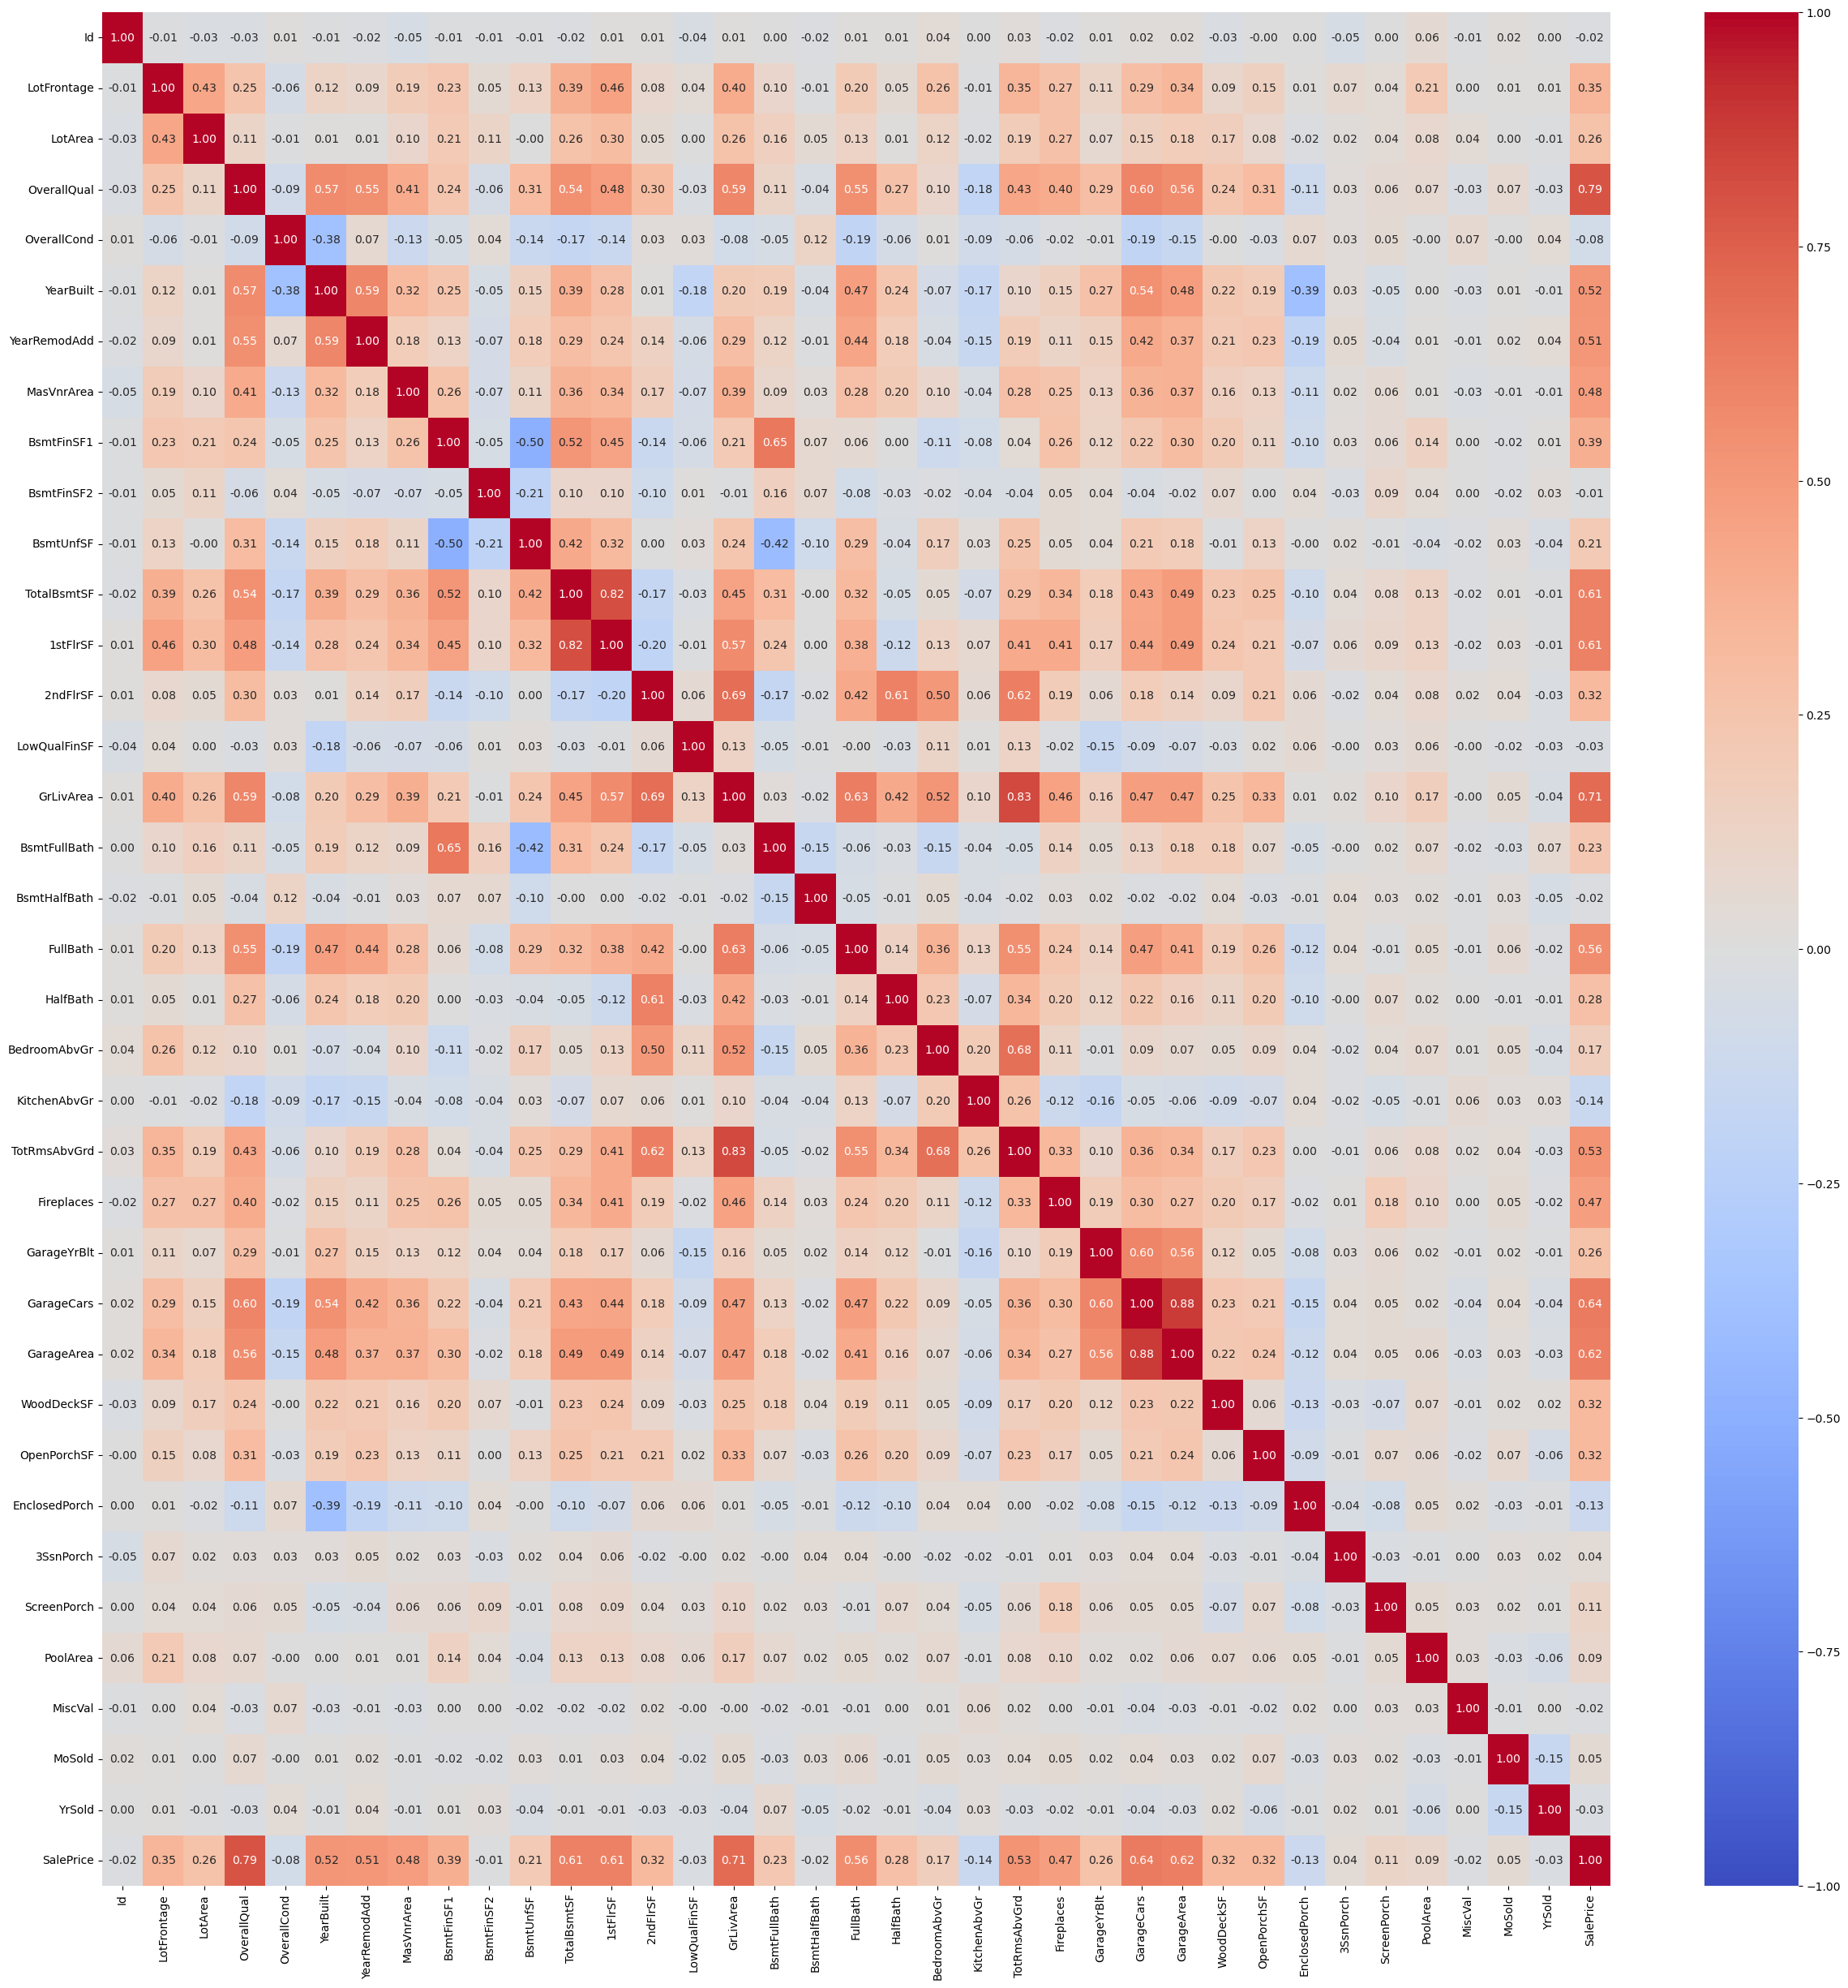

In [19]:
# Creating correlation heatmap
numerical_columns = housing_df.select_dtypes(include=['int64','float64'])
plt.subplots(figsize = (30,30))
sns.heatmap(round(numerical_columns.corr(),2),annot=True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

Below features have very high correlation coefficients.
- GrLivArea and TotRmsAbvGrd= .83
- GarageCars and GarageArea= .88

In [20]:
# Dropping GarageCars and TotRmsAbvGrd
housing_df.drop(['GarageCars','TotRmsAbvGrd'], axis= 1, inplace= True)
housing_df.shape

(1460, 79)

In [21]:
housing_df_org= housing_df.copy()

# Data Preparation
----

Earlier we have already seen that our target variable SalePrice is heavily right skewed. We can perform log transformation to remove the skewness. It will help to boost model performance.

### Transforming the Target variable

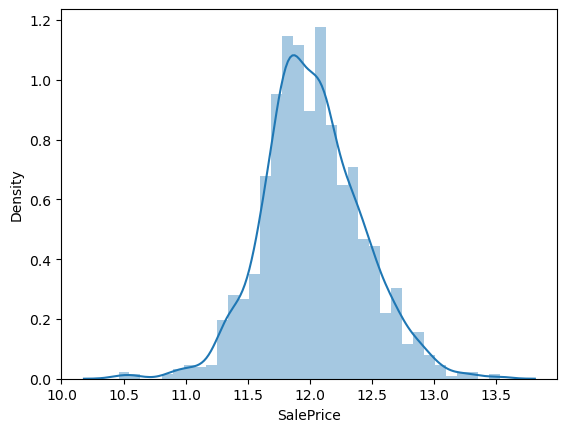

In [22]:
# Distplot of log transformed SalePrice
sns.distplot(np.log(housing_df['SalePrice']))
plt.show()

It can be seen that after log transformation SalePrice has now near normal distribution.

In [23]:
# Transforming 'SalePrice'
housing_df['SalePrice_log_trans']= np.log(housing_df['SalePrice'])

Now, Dropping SalePrice as we have ceate log transformed of it. Also dropping Id column, as it'll not help in predicction.

### Dropping unnecessary columns

In [24]:
# Dropping ID Column and SalePrice
housing_df.drop(['SalePrice','Id'], axis=1, inplace= True)
housing_df.shape

(1460, 78)

### Train-Test split

In [25]:
# Train-Test Split
y= housing_df['SalePrice_log_trans']
X= housing_df.drop('SalePrice_log_trans', axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

In [26]:
# Getting index values of train test dataset
train_index= X_train.index
test_index= X_test.index

### Statistical imputation of missing values

Imputing rest of the features in test and train dataset using median (for continuous variables) and mode (for categorical variables) calculated on train dataset.

In [27]:
# Performing Statistical Imputation for missing values in LotFrontage, MasVnrArea, MasVnrType, Electrical columns

housing_df['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)
housing_df['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)

housing_df['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)
housing_df['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)

housing_df['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)
housing_df['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)

housing_df['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)
housing_df['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)

### Encoding categorical (nominal) features

In [28]:
# Getting object and numeric type columns
housing_cat= housing_df.select_dtypes(include= 'object')
housing_num= housing_df.select_dtypes(exclude= 'object')
housing_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,...,7,4,6,6,3,4,5,5,9,6
top,20,RL,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,Not Present,Not Present,Not Present,WD,Normal
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [29]:
# 'Street','Utilities', 'CentralAir' have 2 unique data, so we are encoding with 0 and 1
housing_df['Street']= housing_df.Street.map(lambda x: 1 if x== 'Pave' else 0)
housing_df['Utilities']= housing_df.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
housing_df['CentralAir']= housing_df.CentralAir.map(lambda x: 1 if x== 'Y' else 0)

For rest of the categorical (Nominal) columns One Hot Encoding will be used.

In [30]:
# Performing get_dummies
cat_cols= housing_cat.columns.tolist()
done_encoding= ['Street','Utilities', 'CentralAir']
cat_cols= [col for col in cat_cols if col not in done_encoding]
dummies= pd.get_dummies(housing_df[cat_cols], drop_first=True)

In [31]:
# Checking all dummies
dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [32]:
# Concatinating dummies with housing_df dataframe and droping original features
print('housing_df before droping original valiables', housing_df.shape)
print('shape of dummies dataframe', dummies.shape)
housing_df.drop(cat_cols, axis=1, inplace= True)
housing_df= pd.concat([housing_df, dummies], axis= 1)
print('final shape of housing_df', housing_df.shape)

housing_df before droping original valiables (1460, 78)
shape of dummies dataframe (1460, 233)
final shape of housing_df (1460, 270)


### Scaling numeric features

During EDA we have observed few outliers in numeric features. So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.

In [33]:
# Re-constructing Train-test data
X_train= housing_df.iloc[train_index, :].drop('SalePrice_log_trans', axis= 1)
y_train= housing_df.iloc[train_index, :]['SalePrice_log_trans']
X_test= housing_df.iloc[test_index, :].drop('SalePrice_log_trans', axis= 1)
y_test= housing_df.iloc[test_index, :]['SalePrice_log_trans']

In [34]:
# Performing scaling of numeric columns in training and test dataset using RobustScaler
num_cols= housing_num.columns.tolist()
num_cols.remove('SalePrice_log_trans')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [35]:
# Checking scaled features
X_train[num_cols].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1452,-0.360825,-0.255342,-0.2,0.0,0.318533,0.186441,0.126743,0.109760,0.000000,-0.290195,...,0.045214,0.000000,0.003912,0.0,0.0,0.0,0.0,0.0,-0.090909,-0.50
762,0.020619,-0.041372,0.2,0.0,0.357143,0.254237,0.000000,-0.255872,0.000000,0.149603,...,0.143361,0.367391,0.070423,0.0,0.0,0.0,0.0,0.0,0.000000,0.50
932,0.144330,0.089208,0.6,0.0,0.328185,0.203390,0.478454,-0.272651,0.000000,0.854362,...,0.335245,0.000000,0.641628,0.0,0.0,0.0,0.0,0.0,-0.272727,-0.25
435,-0.278351,0.045983,0.2,0.2,0.231660,0.033898,0.000000,-0.003496,0.559168,-0.248137,...,0.072783,0.343478,0.133020,0.0,0.0,0.0,0.0,0.0,-0.181818,0.25
629,0.123711,-0.024995,0.0,0.0,-0.077220,-0.508475,0.410330,0.163591,0.546164,-0.117159,...,0.039700,0.382609,-0.105634,0.0,0.0,0.0,0.0,0.0,0.000000,0.00


### Variance Thresholding

During EDA, we have seen that there are few categorical features where only a handful of observations differ from a constant value. Remvoing those categorical features having zero or close to zero variance.

In [36]:
var_t= VarianceThreshold(threshold= .003)
variance_thresh= var_t.fit(X_train)
col_ind= var_t.get_support()

# Below columns have very low variance
X_train.loc[:, ~col_ind].columns

Index(['Utilities', 'MSSubClass_40', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Condition1_RRNe', 'Condition2_Feedr', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_WdShake',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'ExterCond_Po', 'Foundation_Wood', 'BsmtCond_Po', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix',
       'Functional_Sev', 'GarageQual_Po', 'GarageCond_Po', 'PoolQC_Fa',
       'PoolQC_Gd', 'MiscFeature_Othr', 'MiscFeature_TenC', 'SaleType_Con',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth'],
      dtype='object')

In [37]:
# Checking number of apperance of one of the attributes/categorical value in dataset
housing_df_org.Functional.value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

It can be seen that Functional_Sev or Functional with 'Sev' type has only one observation in entire dataset.

In [38]:
# Removing above columns from train and test dataset
X_train= X_train.loc[:, col_ind]
X_test= X_test.loc[:, col_ind]

In [39]:
# Checking shape of final training dataset
X_train.shape

(1021, 225)

# Model Building 
----

### Ridge Regression

In [40]:
# Selecting few values for alpha
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range2= list(range(2, 1001))
range1.extend(range2)
params_grid= {'alpha': range1}

In [41]:
# Applying Ridge and performing GridSearchCV to find optimal value of alpha (lambda)

ridge= Ridge(random_state= 42)
gcv_ridge= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)      
gcv_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [42]:
# Checking best estimator 
gcv_ridge.best_estimator_

Ridge(alpha=8, random_state=42)

In [43]:
# Checking best MAE
gcv_ridge.best_score_

-0.0960831039518371

Optimal value for alpha is 8.

In [44]:
# Fitting model using best_estimator_
ridge_model= gcv_ridge.best_estimator_
ridge_model.fit(X_train, y_train)

Ridge(alpha=8, random_state=42)

In [45]:
# Evaluating on training dataset
y_train_pred= ridge_model.predict(X_train)
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9179548533920602
MSE on training dataset: 0.012729801291248793
RMSE on training dataset: 0.11282642106904213
MAE on training dataset: 0.07633735132651348


In [46]:
# Evaluating on testing dataset
y_test_pred= ridge_model.predict(X_test)
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on testing dataset: 0.8911239959578826
MSE on testing dataset: 0.018429045835145035
RMSE on testing dataset: 0.13575362181225603
MAE on testing dataset: 0.09348813534783436


In [47]:
# Ridge coefficients
ridge_model.coef_

array([-2.26326915e-02,  3.25569682e-02,  7.42859574e-03,  2.23900481e-01,
        1.24542987e-01,  7.63690802e-02,  7.27991463e-02, -4.25471727e-03,
       -1.58603216e-02,  2.30299854e-02,  1.58866412e-02,  8.98674720e-03,
        7.11895368e-02,  1.12323185e-01,  1.18572768e-01,  2.16728066e-04,
        1.63110187e-01,  4.35549556e-02,  2.17062850e-03,  9.51398476e-02,
        4.74816294e-02,  7.79897508e-02, -3.33293862e-02,  3.36557988e-02,
        2.13451325e-02,  1.15908949e-01,  5.22374292e-02, -8.02447230e-03,
        2.60377773e-02,  2.54491582e-04,  5.55111984e-02, -1.55191955e-04,
       -1.85042144e-03,  1.38663511e-02, -1.14241947e-02, -9.05253587e-02,
       -5.77262276e-03,  3.17981782e-03, -8.83523637e-03,  4.51469491e-02,
        2.74821081e-02, -8.66805167e-03,  1.13568439e-02, -3.88875780e-03,
       -2.80705982e-02, -8.23853598e-02, -2.06104139e-02, -1.25253765e-02,
        3.95204225e-02,  1.41031706e-02,  4.08516356e-02, -9.16259372e-03,
       -2.67647714e-02,  

In [48]:
# Ridge intercept
ridge_model.intercept_

11.67918083193674

In [49]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef= pd.Series(ridge_model.coef_, index= X_train.columns)
top_25_ridge=  ridge_coef[abs(ridge_coef).nlargest(25).index]
top_25_ridge

OverallQual             0.223900
GrLivArea               0.163110
OverallCond             0.124543
2ndFlrSF                0.118573
GarageArea              0.115909
Neighborhood_StoneBr    0.115830
1stFlrSF                0.112323
FullBath                0.095140
Exterior1st_BrkFace     0.094080
MSSubClass_30          -0.090525
BsmtQual_TA            -0.083806
Neighborhood_MeadowV   -0.082676
LandContour_HLS         0.082389
MSSubClass_160         -0.082385
Neighborhood_NridgHt    0.081113
Neighborhood_Crawfor    0.079755
BedroomAbvGr            0.077990
YearBuilt               0.076369
Neighborhood_Edwards   -0.075787
YearRemodAdd            0.072799
KitchenQual_TA         -0.072791
Functional_Maj2        -0.072569
SaleCondition_Alloca    0.071932
CentralAir              0.071190
BldgType_Twnhs         -0.070915
dtype: float64

### Lasso Regression

In [50]:
# Applying Lasso and performing GridSearchCV to find optimal value of alpha (lambda)

params_grid= {'alpha': range1}
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)         

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
# Checking best estimator 
lasso_gcv.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [52]:
# Checking best MAE
lasso_gcv.best_score_

-0.09505348475372773

Optimal value for alpha is .0001. Next I'll try to fine tune this value by running GridSearchCV with some closer values to .0001

In [53]:
range3= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
params_grid= {'alpha': range3}
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)     

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Checking best estimator 
lasso_gcv.best_estimator_

Lasso(alpha=0.0006, random_state=42)

So, for Lasso we are getting optimal value of alpha as .0006.

In [55]:
# Fitting model using best_estimator_
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0006, random_state=42)

In [56]:
# Evaluating on training dataset
y_train_pred= lasso_model.predict(X_train)
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9102026333466191
MSE on training dataset: 0.013932605172093476
RMSE on training dataset: 0.11803645696179411
MAE on training dataset: 0.07853808221538569


In [57]:
# Evaluating on testing dataset
y_test_pred= lasso_model.predict(X_test)
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on testing dataset: 0.8947388703141926
MSE on testing dataset: 0.017817169179799048
RMSE on testing dataset: 0.13348096935443288
MAE on testing dataset: 0.09142248684581762


In [58]:
# Checking no. of features in Ridge and Lasso models
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 115
Features present in Ridge: 225


In [59]:
# Lasso intercept
lasso_model.intercept_

11.720771688172986

In [60]:
# Top 25 features with coefficients in Lasso model
top25_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25_features_lasso

GrLivArea                 0.377284
OverallQual               0.309814
OverallCond               0.144187
Neighborhood_StoneBr      0.136855
GarageArea                0.134740
YearBuilt                 0.113232
Exterior1st_BrkFace       0.103737
Neighborhood_NridgHt      0.100029
Neighborhood_Crawfor      0.096630
MSSubClass_30            -0.095873
BldgType_Twnhs           -0.086800
BsmtQual_Not Present     -0.080276
FullBath                  0.078851
LandContour_HLS           0.074669
YearRemodAdd              0.073643
CentralAir                0.071643
GarageType_Not Present   -0.071632
BldgType_TwnhsE          -0.071169
Neighborhood_NoRidge      0.068999
LotShape_IR3             -0.063474
Neighborhood_Somerst      0.061474
BsmtExposure_Gd           0.059686
BedroomAbvGr              0.058772
ScreenPorch               0.057451
MSSubClass_160           -0.057429
dtype: float64

# Conclusion
---

- Ridge and Lasso both the models have almost same test and train accuracy. So it can be said that there is no overfitting.
- Lasso and Ridge both have similar r2 score and MAE on test dataset. But Lasso has eliminated 110 features and final no. of features in Lasso Regression model is 116. Where Ridge has all 226 features. So, our Lasso model is simpler than Ridge with having similar r2 score and MAE.
    - Ridge Regression model on test dataset: r2 score= 0.8912, MAE= 0.0934, RMSE= 0.1357
    - Lasso Regression model on test dataset: r2 score= 0.8947, MAE= 0.0914, RMSE= 0.1335
     
- Considering above points we can choose our Lasso Regression model as our final model.
- Below are the top 25 features in the Lasso regression model.

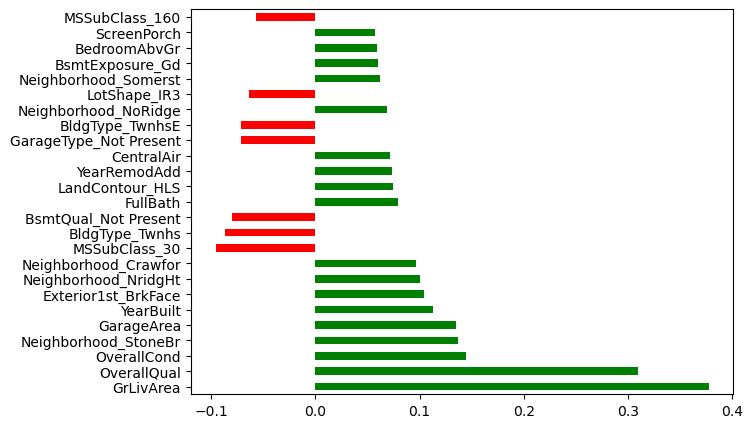

In [61]:
# Ploting top 25 features
plt.figure(figsize= (7, 5))
top25_features_lasso.plot.barh(color= (top25_features_lasso > 0).map({True: 'g', False: 'r'}))
plt.show()

- Optimal alpha (lambda) value for Ridge Regression model is: 8
- Optimal alpha (lambda) value for Lasso Regression model is: 0.0006

---

---
# Assignment II
---

### Scenario 1:  Doubling the value of optimal alpha

In [62]:
## Doubling value of optimal alpha in Ridge
ridge2= Ridge(alpha= 16, random_state= 42)
ridge2.fit(X_train, y_train)

Ridge(alpha=16, random_state=42)

In [63]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge2.coef_, index= X_train.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

OverallQual             0.205087
GrLivArea               0.145067
OverallCond             0.111152
GarageArea              0.106078
1stFlrSF                0.103111
2ndFlrSF                0.101927
FullBath                0.091102
Neighborhood_StoneBr    0.087874
MSSubClass_30          -0.081812
Exterior1st_BrkFace     0.078336
dtype: float64

In [64]:
## Doubling value of optimal alpha in Lasso
lasso2= Lasso(alpha= .0012, random_state=42)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0012, random_state=42)

In [65]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2= pd.Series(lasso2.coef_, index= X_train.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

GrLivArea               0.368980
OverallQual             0.364968
GarageArea              0.148864
OverallCond             0.130028
Neighborhood_StoneBr    0.086032
Exterior1st_BrkFace     0.081740
Neighborhood_NridgHt    0.080809
MSSubClass_30          -0.080712
YearRemodAdd            0.076909
CentralAir              0.076685
dtype: float64

### Scenario 2: 5 most important predictor variables in the lasso model are not available in the incoming data

In [66]:
# Checking top 5 features in our lasso model
top25_features_lasso.nlargest()

GrLivArea               0.377284
OverallQual             0.309814
OverallCond             0.144187
Neighborhood_StoneBr    0.136855
GarageArea              0.134740
dtype: float64

As Neighborhood_StoneBr is a dummy variable, we'll drop entire Neighborhood feature.

In [67]:
# Checking all Neighborhood dummy variables
cols_to_drop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_to_drop

['Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [68]:
# Droping above features from X_train and X_test
X_train= X_train.drop(cols_to_drop, axis= 1)
X_test= X_test.drop(cols_to_drop, axis= 1)
X_train.shape, X_test.shape

((1021, 198), (439, 198))

In [69]:
# Building Lasso model with these features
lasso3= Lasso(alpha= .0006, random_state= 42)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.0006, random_state=42)

In [70]:
# Top 5 features after droping top 5 features of Previous Lasso model
lasso_coef3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest().index]
top5_lasso3

1stFlrSF                  0.402011
2ndFlrSF                  0.369645
GarageType_Not Present   -0.136456
KitchenQual_TA           -0.132718
Exterior1st_BrkFace       0.130630
dtype: float64